In [1]:
'''data'''
import pandas as pd
import numpy as np
from datetime import datetime
import math


'''plotting'''
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import seaborn as sns

'''sys library'''
#plt.style.use('fivethirtyeight')
import warnings
import os
import gc
import time
warnings.filterwarnings('ignore')
%matplotlib inline
rc('font',family="NanumSquareR")

'''modeling'''
from sklearn.ensemble import RandomForestClassifier
#from ggplot import *
from sklearn.linear_model import LinearRegression
import scipy.stats as st
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import uniform, randint
from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

#-*- coding: utf-8 -*-

In [2]:
data = pd.read_csv('plant1_train_version1.csv')

In [14]:
data.groupby('plant1_train.cond_loc1')['plant1_train.cond_loc1'].agg([('개수','size')]).reset_index()

,plant1_train.cond_loc1,개수
0,0.0,57604
1,1.0,275


# ***Data Import***

In [2]:
# valid data
valid = pd.read_csv('참가번호6자리.csv')

In [6]:
# train, test data
train_24_recent= pd.read_csv('train24_MY.csv')
train_48_recent = pd.read_csv('train48_MY.csv')
dj_ts_aws_recent= pd.read_csv('test_MY.csv')

In [9]:
train_24_recent.shape

(347952, 75)

In [ ]:
# train, test
# + asos
# + aws
# + 동네
# + 이슬점

In [46]:
train_24_recent.shape

(347952, 75)

In [47]:
tr_24_ori = pd.read_csv('train_24.csv')

In [48]:
tr_24_ori.head()

,after24_loc_predict,date,plant_train.cond_loc,plant_train.hum_in,plant_train.tem_coil,plant_train.tem_in,plant_train.tem_out_loc1,plant_train.hum_out_loc1,loc,plant
0,0.0,2016-04-01 00:00:00,0.0,24.0,11.0,16.0,9.0,42.0,1,1
1,0.0,2016-04-01 03:00:00,0.0,28.0,10.0,14.0,7.0,59.0,1,1
2,0.0,2016-04-01 06:00:00,0.0,33.0,10.0,13.0,6.0,56.0,1,1
3,0.0,2016-04-01 09:00:00,0.0,33.0,10.0,13.0,18.0,30.0,1,1
4,0.0,2016-04-01 12:00:00,0.0,28.0,10.0,16.0,18.0,20.0,1,1


In [50]:
tr_24_ori.isnull().sum()

after24_loc_predict           0
date                          0
plant_train.cond_loc        335
plant_train.hum_in          335
plant_train.tem_coil        311
plant_train.tem_in          335
plant_train.tem_out_loc1    287
plant_train.hum_out_loc1    287
loc                           0
plant                         0
dtype: int64

In [4]:
tr_24_ori = train_24_recent[['loc','plant','after24_loc_predict','hum_in','tem_coil','tem_in','tem_out_loc1','hum_out_loc1']]
tr_24_ori

,loc,plant,after24_loc_predict,hum_in,tem_coil,tem_in,tem_out_loc1,hum_out_loc1
0,1,1,0.0,24.00,11.00,16.00,9.00,42.00
1,1,1,0.0,28.00,10.00,14.00,7.00,59.00
2,1,1,0.0,33.00,10.00,13.00,6.00,56.00
3,1,1,0.0,33.00,10.00,13.00,18.00,30.00
4,1,1,0.0,28.00,10.00,16.00,18.00,20.00
...,...,...,...,...,...,...,...,...
347947,3,2,0.0,54.18,10.25,8.72,5.05,73.32
347948,3,2,0.0,54.67,10.29,8.78,5.12,74.05
347949,3,2,0.0,54.67,10.29,8.75,5.18,72.65
347950,3,2,0.0,55.01,10.21,8.75,5.24,70.91


In [5]:
tr_48_ori = train_48_recent[['loc','plant','after48_loc_predict','hum_in','tem_coil','tem_in','tem_out_loc1','hum_out_loc1']]
tr_48_ori

,loc,plant,after48_loc_predict,hum_in,tem_coil,tem_in,tem_out_loc1,hum_out_loc1
0,1,1,0.0,24.00,11.00,16.00,9.00,42.00
1,1,1,0.0,28.00,10.00,14.00,7.00,59.00
2,1,1,0.0,33.00,10.00,13.00,6.00,56.00
3,1,1,0.0,33.00,10.00,13.00,18.00,30.00
4,1,1,0.0,28.00,10.00,16.00,18.00,20.00
...,...,...,...,...,...,...,...,...
346829,3,2,0.0,50.98,11.59,10.64,6.98,67.86
346830,3,2,0.0,51.56,11.32,10.64,7.01,68.80
346831,3,2,0.0,51.83,11.32,10.61,7.07,69.84
346832,3,2,0.0,52.05,11.43,10.58,7.04,71.12


In [6]:
ts_ori = dj_ts_aws_recent[['loc','plant','hum_in','tem_coil','tem_in','tem_out_loc1','hum_out_loc1']]
ts_ori

,loc,plant,hum_in,tem_coil,tem_in,tem_out_loc1,hum_out_loc1
0,3,2,40.42,10.10,8.17,4.20,54.82
1,2,1,48.81,10.79,10.03,6.09,59.34
2,3,2,40.93,9.07,9.45,12.26,32.14
3,1,1,34.13,10.86,12.32,12.32,28.27
4,1,2,22.65,8.76,11.28,12.01,19.84
...,...,...,...,...,...,...,...
3534,2,1,33.36,13.30,10.73,6.28,46.37
3535,3,2,38.86,11.70,9.15,1.39,74.33
3536,1,2,44.87,9.03,7.10,4.26,58.06
3537,1,1,33.49,12.20,13.54,12.90,33.67


In [5]:
drop_columns = ['dew_out','coil_dew_point','coil_dew_point_plus3','tem_in_dew_point_interval','tem_in_dew_point3_interval',
                'coil_tem_dew_point_interval','coil_tem_dew_point3_interval','coil_tem_dew_point_tf','coil_tem_dew_point3_tf']

In [7]:
tr_isx_24 = train_24_recent.drop(drop_columns, axis=1)
tr_isx_48 = train_48_recent.drop(drop_columns, axis=1)
ts_isx = dj_ts_aws_recent.drop(drop_columns, axis=1)

In [43]:
train_24_recent.columns

Index(['plant_train.tem_coil_log', 'sun_log', 'time',
       'plant_train.tem_out_loc1_log', 'loc', 'wind_direct_log', 'tem_coil_25',
       'season', 'sum_en_log', 'plant_train.hum_out_loc1_log',
       'wind_speed_log', '1m_rain', 'wind_speed_x', 'asos_hum_log',
       'tem_out_loc1', 'wind_speed_y', 'month', 'rain_log', 'sum_en', 'plant',
       'temp', 'hum_in', 'asos_hum_95', 'sea_pres_log', 'sun',
       'tem_coil_in_ratio', 'hum_out_loc1', 'humid', 'pres', 'asos_hum',
       'wind_direct_x', 'tem_coil_510', 'hum_out_4361', 'tem_coil',
       'hum_tem_coil', 'tem_26', 'asos_tem_log', 'rain', 'tem_in_out',
       'wind_direct_y', 'tem_coil_in', 'pres_log', 'plant_train.hum_in_log',
       'tem_in', 'plant_train.tem_in_log', 'asos_tem', 'sea_pres',
       'rain_ornot', 'sp_rain_ornot', 'dong_hum', 'sp_tem', 'sp_1m_rain',
       'sp_sea_press', 'dong_thunder', 'dong_windsp', 'sp_wind_direct',
       'sp_press', 'cloud', 'dong_tem', 'sp_iljo', 'dong_raintype',
       'sp_wind_speed',

In [74]:
dj_ts_aws_recent.head()

,plant,loc,tem_in,hum_in,tem_coil,tem_out_loc1,hum_out_loc1,temp,1m_rain,rain_ornot,...,sp_iljo,dew_out,coil_dew_point,coil_dew_point_plus3,tem_in_dew_point_interval,tem_in_dew_point3_interval,coil_tem_dew_point_interval,coil_tem_dew_point3_interval,coil_tem_dew_point_tf,coil_tem_dew_point3_tf
0,2,3,8.17,40.42,10.10,4.20,54.82,2.8,0.0,0.0,...,0.0,-4.300000,-4.509227,-1.509227,12.679227,9.679227,14.609227,11.609227,True,True
1,1,2,10.03,48.81,10.79,6.09,59.34,2.5,0.0,0.0,...,0.0,-5.966667,-0.263488,2.736512,10.293488,7.293488,11.053488,8.053488,True,True
2,2,3,9.45,40.93,9.07,12.26,32.14,7.9,0.0,0.0,...,0.0,-7.633333,-3.187051,-0.187051,12.637051,9.637051,12.257051,9.257051,True,True
3,1,1,12.32,34.13,10.86,12.32,28.27,8.3,0.0,0.0,...,0.0,-9.300000,-3.067709,-0.067709,15.387709,12.387709,13.927709,10.927709,True,True
4,2,1,11.28,22.65,8.76,12.01,19.84,9.8,0.0,0.0,...,0.0,-8.700000,-9.337325,-6.337325,20.617325,17.617325,18.097325,15.097325,True,True


In [2]:
tr_24 = pd.read_csv('tr_24_final.csv')

In [3]:
tr_24.columns

Index(['date', 'plant', 'loc', 'tem_in', 'hum_in', 'tem_coil', 'tem_out_loc1',
       'hum_out_loc1', 'temp', '1m_rain', 'rain_ornot', 'wind_direct_x',
       'wind_speed_x', 'humid', 'tem_in_out', 'tem_coil_in',
       'tem_coil_in_ratio', 'asos_tem', 'rain', 'wind_direct_y',
       'wind_speed_y', 'pres', 'sea_pres', 'asos_hum', 'sum_en', 'sun',
       'month', 'season', 'time', 'tem_26', 'tem_coil_510', 'tem_coil_25',
       'hum_out_4361', 'asos_hum_95', 'hum_tem_coil', 'plant_train.hum_in_log',
       'plant_train.tem_coil_log', 'plant_train.tem_in_log',
       'plant_train.tem_out_loc1_log', 'plant_train.hum_out_loc1_log',
       'asos_tem_log', 'rain_log', 'wind_direct_log', 'wind_speed_log',
       'pres_log', 'sea_pres_log', 'asos_hum_log', 'sum_en_log', 'sun_log',
       'dong_rain', 'dong_raintype', 'dong_tem', 'dong_thunder', 'dong_hum',
       'dong_windsp', 'dong_winddrt', 'cloud', 'sp_tem', 'sp_1m_rain',
       'sp_rain_ornot', 'sp_wind_direct', 'sp_wind_speed', 'sp_pres

In [4]:
tr_24.head()

,date,plant,loc,tem_in,hum_in,tem_coil,tem_out_loc1,hum_out_loc1,temp,1m_rain,...,sp_tem,sp_1m_rain,sp_rain_ornot,sp_wind_direct,sp_wind_speed,sp_press,sp_sea_press,sp_ilsa,sp_iljo,dew
0,2016-04-01 00:00:00,1,1,16.0,24.0,11.0,9.0,42.0,6.8,0.0,...,7.2,0.0,0.0,216.9,1.1,1013.0,1015.7,0.0,0.0,-3.7
1,2016-04-01 03:00:00,1,1,14.0,28.0,10.0,7.0,59.0,5.2,0.0,...,4.7,0.0,0.0,154.0,1.2,1012.2,1014.9,0.0,0.0,-5.2
2,2016-04-01 06:00:00,1,1,13.0,33.0,10.0,6.0,56.0,6.8,0.0,...,3.5,0.0,0.0,200.6,1.1,1012.4,1015.1,0.0,0.0,-2.0
3,2016-04-01 09:00:00,1,1,13.0,33.0,10.0,18.0,30.0,13.9,0.0,...,12.2,0.0,0.0,161.4,0.6,1014.0,1016.7,0.0,0.0,0.0
4,2016-04-01 12:00:00,1,1,16.0,28.0,10.0,18.0,20.0,20.4,0.0,...,20.1,0.0,0.0,15.4,1.4,1013.0,1015.6,0.0,0.0,-0.7


In [5]:
df = tr_24.copy()

In [8]:
trr24 = pd.read_csv('train_24.csv')
trr48 = pd.read_csv('train_48.csv')

In [9]:
trr24.head()

,after24_loc_predict,date,plant_train.cond_loc,plant_train.hum_in,plant_train.tem_coil,plant_train.tem_in,plant_train.tem_out_loc1,plant_train.hum_out_loc1,loc,plant
0,0.0,2016-04-01 00:00:00,0.0,24.0,11.0,16.0,9.0,42.0,1,1
1,0.0,2016-04-01 03:00:00,0.0,28.0,10.0,14.0,7.0,59.0,1,1
2,0.0,2016-04-01 06:00:00,0.0,33.0,10.0,13.0,6.0,56.0,1,1
3,0.0,2016-04-01 09:00:00,0.0,33.0,10.0,13.0,18.0,30.0,1,1
4,0.0,2016-04-01 12:00:00,0.0,28.0,10.0,16.0,18.0,20.0,1,1


In [10]:
trr24.tail()

,after24_loc_predict,date,plant_train.cond_loc,plant_train.hum_in,plant_train.tem_coil,plant_train.tem_in,plant_train.tem_out_loc1,plant_train.hum_out_loc1,loc,plant
347947,0.0,2019-03-30 23:00:00,0.0,54.18,10.25,8.72,5.05,73.32,3,2
347948,0.0,2019-03-30 23:10:00,0.0,54.67,10.29,8.78,5.12,74.05,3,2
347949,0.0,2019-03-30 23:20:00,0.0,54.67,10.29,8.75,5.18,72.65,3,2
347950,0.0,2019-03-30 23:30:00,0.0,55.01,10.21,8.75,5.24,70.91,3,2
347951,0.0,2019-03-30 23:40:00,0.0,55.10,10.25,8.69,5.21,71.70,3,2


In [11]:
trr24_1 = trr24[['date','plant','loc','plant_train.cond_loc']]
trr24_1

,date,plant,loc,plant_train.cond_loc
0,2016-04-01 00:00:00,1,1,0.0
1,2016-04-01 03:00:00,1,1,0.0
2,2016-04-01 06:00:00,1,1,0.0
3,2016-04-01 09:00:00,1,1,0.0
4,2016-04-01 12:00:00,1,1,0.0
...,...,...,...,...
347947,2019-03-30 23:00:00,2,3,0.0
347948,2019-03-30 23:10:00,2,3,0.0
347949,2019-03-30 23:20:00,2,3,0.0
347950,2019-03-30 23:30:00,2,3,0.0


In [12]:
df1 = pd.merge(df, trr24_1, on=['date','plant','loc'])
df1

,date,plant,loc,tem_in,hum_in,tem_coil,tem_out_loc1,hum_out_loc1,temp,1m_rain,...,sp_1m_rain,sp_rain_ornot,sp_wind_direct,sp_wind_speed,sp_press,sp_sea_press,sp_ilsa,sp_iljo,dew,plant_train.cond_loc
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,6.8,0.0,...,0.0,0.0,216.9,1.1,1013.0,1015.7,0.0,0.0,-3.7,0.0
1,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,5.2,0.0,...,0.0,0.0,154.0,1.2,1012.2,1014.9,0.0,0.0,-5.2,0.0
2,2016-04-01 06:00:00,1,1,13.00,33.00,10.00,6.00,56.00,6.8,0.0,...,0.0,0.0,200.6,1.1,1012.4,1015.1,0.0,0.0,-2.0,0.0
3,2016-04-01 09:00:00,1,1,13.00,33.00,10.00,18.00,30.00,13.9,0.0,...,0.0,0.0,161.4,0.6,1014.0,1016.7,0.0,0.0,0.0,0.0
4,2016-04-01 12:00:00,1,1,16.00,28.00,10.00,18.00,20.00,20.4,0.0,...,0.0,0.0,15.4,1.4,1013.0,1015.6,0.0,0.0,-0.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347947,2019-03-30 23:00:00,2,3,8.72,54.18,10.25,5.05,73.32,4.0,0.0,...,0.0,0.0,275.4,3.9,1012.7,1015.2,0.0,0.0,-1.2,0.0
347948,2019-03-30 23:10:00,2,3,8.78,54.67,10.29,5.12,74.05,3.9,0.0,...,0.0,0.0,283.9,6.0,1012.7,1015.2,0.0,0.0,NaN,0.0
347949,2019-03-30 23:20:00,2,3,8.75,54.67,10.29,5.18,72.65,3.9,0.0,...,0.0,0.0,286.0,6.1,1012.9,1015.4,0.0,0.0,NaN,0.0
347950,2019-03-30 23:30:00,2,3,8.75,55.01,10.21,5.24,70.91,3.9,0.0,...,0.0,0.0,276.3,4.0,1013.0,1015.5,0.0,0.0,NaN,0.0


In [15]:
plt.rc('font', family='nanumgothic')
plt.rc('axes', unicode_minus=False)
# 한글 폰트 세팅

In [17]:
a['plant_train.cond_loc']

0    0.0
1    1.0
Name: plant_train.cond_loc, dtype: object

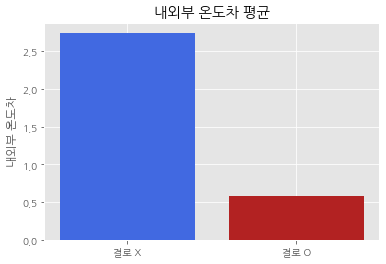

In [36]:
#plt.style.use('ggplot') #ggplot스타일 사용
#plt.rc('axes', unicode_minus=False)

# 내외부 온도차 평균

df1['tem_in_out'] = df1['tem_in']-df1['tem_out_loc1']
a = df1.groupby('plant_train.cond_loc')['tem_in_out'].agg([('평균','mean')]).reset_index()
a['plant_train.cond_loc'] = a['plant_train.cond_loc'].astype('str')
plt.bar(a['plant_train.cond_loc'], a['평균'], color=['royalblue','firebrick'])
plt.xticks(a['plant_train.cond_loc'], ['결로 X', '결로 O'])
plt.ylabel('내외부 온도차')
plt.title('내외부 온도차 평균')
plt.show()

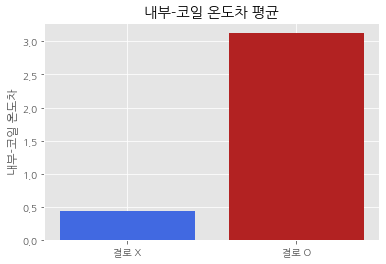

In [37]:
# 코일과 내부 온도차

df1['tem_coil_in'] = df1['tem_in']-df1['tem_coil']
a = df1.groupby('plant_train.cond_loc')['tem_coil_in'].agg([('평균','mean')]).reset_index()
a['plant_train.cond_loc'] = a['plant_train.cond_loc'].astype('str')
plt.bar(a['plant_train.cond_loc'], a['평균'], color=['royalblue','firebrick'])
plt.xticks(a['plant_train.cond_loc'], ['결로 X', '결로 O'])
plt.ylabel('내부-코일 온도차')
plt.title('내부-코일 온도차 평균')
plt.show()

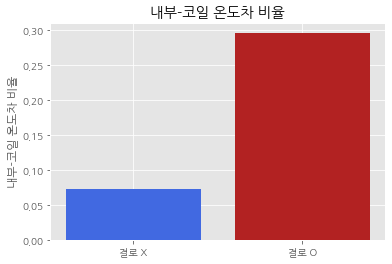

In [38]:
# 코일과 내부 온도차 비율

df1['tem_coil_in_ratio'] = df1['tem_coil_in'] / df1['tem_in']
a = df1.groupby('plant_train.cond_loc')['tem_coil_in_ratio'].agg([('평균','mean')]).reset_index()
a['plant_train.cond_loc'] = a['plant_train.cond_loc'].astype('str')
plt.bar(a['plant_train.cond_loc'], a['평균'], color=['royalblue','firebrick'])
plt.xticks(a['plant_train.cond_loc'], ['결로 X', '결로 O'])
plt.ylabel('내부-코일 온도차 비율')
plt.title('내부-코일 온도차 비율')
plt.show()

In [90]:
df.tail()

,date,plant,loc,tem_in,hum_in,tem_coil,tem_out_loc1,hum_out_loc1,temp,1m_rain,...,sp_tem,sp_1m_rain,sp_rain_ornot,sp_wind_direct,sp_wind_speed,sp_press,sp_sea_press,sp_ilsa,sp_iljo,dew
347947,2019-03-30 23:00:00,2,3,8.72,54.18,10.25,5.05,73.32,4.0,0.0,...,4.5,0.0,0.0,275.4,3.9,1012.7,1015.2,0.0,0.0,-1.2
347948,2019-03-30 23:10:00,2,3,8.78,54.67,10.29,5.12,74.05,3.9,0.0,...,4.5,0.0,0.0,283.9,6.0,1012.7,1015.2,0.0,0.0,NaN
347949,2019-03-30 23:20:00,2,3,8.75,54.67,10.29,5.18,72.65,3.9,0.0,...,4.4,0.0,0.0,286.0,6.1,1012.9,1015.4,0.0,0.0,NaN
347950,2019-03-30 23:30:00,2,3,8.75,55.01,10.21,5.24,70.91,3.9,0.0,...,4.4,0.0,0.0,276.3,4.0,1013.0,1015.5,0.0,0.0,NaN
347951,2019-03-30 23:40:00,2,3,8.69,55.10,10.25,5.21,71.70,3.9,0.0,...,4.5,0.0,0.0,279.0,5.8,1013.1,1015.6,0.0,0.0,NaN


# ***Function***

In [7]:
# train, test 분할
def train_test(df,target_variable,size):
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = target_variable),df[target_variable],test_size = size, random_state = 0)
    
    return X_train, X_test, y_train, y_test

def proba_to_int(value_ls,cut_off):
    
    preds = []
    for i in range(len(value_ls)):
        
        if value_ls[i] >= cut_off:
            preds.append(1)
        else:
            preds.append(0)
            
            
    return preds

def nan_preprocessing(df,col):
    col_value = []
    for i in range(len(df)):
        if i != 0 and str(df[col].iloc[i]) == 'nan':

            if str(df[col].iloc[i-1]) == 'nan':
                pass

            else:

                for j in range(i+1,len(df)):
                    if str(df[col].iloc[j]) != 'nan':
                        interval = abs(df[col].iloc[i-1] - df[col].iloc[j])
                        cnt = j - (i-1)

                        value = interval / cnt 

                        value2 = df[col].iloc[i-1]

                        if df[col].iloc[i-1] < df[col].iloc[j]:
                            right_left = 'left'

                        else:
                            right_left = 'right'

                        for k in range(0,cnt - 1):

                            if right_left == 'left':
                                value2 += value
                                col_value.append(value2)
                            elif right_left == 'right':
                                value2 -= value
                                col_value.append(value2)

                        break


                    elif str(df[col].iloc[j]) == 'nan':
                        pass
        else:
            col_value.append(df[col].iloc[i])
    return col_value

# ***Logistic***

In [44]:
def logi_classifier(df,test_df, target_variable, num_folds, cut_off, real_train = False):
    
    if real_train == False:
        df.fillna(-999, inplace=True)
        X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = target_variable),df[target_variable],test_size = 0.25, random_state = 0)

        folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001)

        oof_preds = np.zeros(X_train.shape[0])
        test_preds = np.zeros(X_test.shape[0])
        feature_importance_df = pd.DataFrame()

        for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_train,y_train)):

            train_x, train_y = X_train.iloc[train_idx], y_train.iloc[train_idx]
            valid_x, valid_y = X_train.iloc[valid_idx], y_train.iloc[valid_idx]

            # 파라미터 삽입
            '''params = {}base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=5,
              min_child_weight=0.4, monotone_constraints='()', n_estimators=1000, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None'''
            

        
            clf =LogisticRegression()

            # 모델 평가척도로 어떤것을 사용할 것인지
            clf.fit(train_x, train_y)

            oof_preds[valid_idx] = clf.predict_proba(valid_x)[:,1]
            test_preds += clf.predict_proba(X_test)[:,1] / folds.n_splits
            '''
            fold_importance_df = pd.DataFrame()
            fold_importance_df["feature"] = X_train.columns
            fold_importance_df["importance"] = clf.feature_importances_
            fold_importance_df["fold"] = n_fold + 1
            feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
            '''
            
            print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))

            del clf, train_x, train_y, valid_x, valid_y
            gc.collect()

        print('Full AUC score %.6f' % roc_auc_score(y_train, oof_preds))

        #feature_importance_fin = feature_importance_df[["feature", "importance"]].\
         #                       groupby("feature").mean().sort_values(by="importance", ascending=False)

        preds = []

        for i in range(len(test_preds)):
            if test_preds[i] >= cut_off:

                preds.append(1)
            else:
                preds.append(0)

        print('Test AUC score : ', roc_auc_score(y_test, test_preds))
        conf_matrix = confusion_matrix(y_test, preds,labels = [1,0])
        
        #plt.figure(figsize = (16,12))
        #plt.barh(feature_importance_fin.index,feature_importance_fin['importance'])


        return test_preds, preds, y_test, conf_matrix
    
    elif real_train == True:
        df.fillna(-999, inplace=True)
        test_df.fillna(-999, inplace=True)
        
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001)
        
        test_preds = np.zeros(test_df.shape[0])
        feature_importance_df = pd.DataFrame()
        
        X_train = df.drop(columns = target_variable)
        y_train = df[target_variable]
        oof_preds = np.zeros(X_train.shape[0])
        
        test_df = test_df[X_train.columns.tolist()] #컬럼 순서를 맞춰주기 위한 장치
        
        for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_train,y_train)):

            train_x, train_y = X_train.iloc[train_idx], y_train.iloc[train_idx]
            valid_x, valid_y = X_train.iloc[valid_idx], y_train.iloc[valid_idx]

            # 파라미터 삽입
            '''params = {}'''

            clf = LogisticRegression()

            # 모델 평가척도로 어떤것을 사용할 것인지
            clf.fit(train_x, train_y)

            oof_preds[valid_idx] = clf.predict_proba(valid_x)[:,1]
            test_preds += clf.predict_proba(test_df)[:,1] / folds.n_splits
            
            '''
            fold_importance_df = pd.DataFrame()
            fold_importance_df["feature"] = X_train.columns
            fold_importance_df["importance"] = clf.feature_importances_
            fold_importance_df["fold"] = n_fold + 1
            feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
            '''
            print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))

            del clf, train_x, train_y, valid_x, valid_y
            gc.collect()

        print('Full AUC score %.6f' % roc_auc_score(y_train, oof_preds))

        #feature_importance_fin = feature_importance_df[["feature", "importance"]].\
         #                       groupby("feature").mean().sort_values(by="importance", ascending=False)

        preds = []

        for i in range(len(test_preds)):
            if test_preds[i] >= cut_off:

                preds.append(1)
            else:
                preds.append(0)

                
        #plt.figure(figsize = (16,12))
        #plt.barh(feature_importance_fin.index,feature_importance_fin['importance'])

        return test_preds, preds

### ***Validation***

In [45]:
# 결측치를 처리한 버전
test_preds_logi24, preds_logi24, y_test_logi24, conf_matrix_logi24 = logi_classifier(\
                                                                                        train_24_recent,
                                                                                        dj_ts_aws_recent,
                                                                                        'after24_loc_predict',
                                                                                        5,
                                                                                        0.5,
                                                                                        real_train = False)

Fold  1 AUC : 0.891090
Fold  2 AUC : 0.894416
Fold  3 AUC : 0.851703
Fold  4 AUC : 0.889212
Fold  5 AUC : 0.846605
Full AUC score 0.875122
Test AUC score :  0.879208103450365


In [46]:
# 결측치를 처리한 버전
test_preds_logi48, preds_logi48, y_test_logi48, conf_matrix_logi48 = logi_classifier(\
                                                                                        train_48_recent,
                                                                                        dj_ts_aws_recent,
                                                                                        'after48_loc_predict',
                                                                                        5,
                                                                                        0.5,
                                                                                        real_train = False)

Fold  1 AUC : 0.818801
Fold  2 AUC : 0.790853
Fold  3 AUC : 0.811066
Fold  4 AUC : 0.803916
Fold  5 AUC : 0.803123
Full AUC score 0.805265
Test AUC score :  0.8084047398744715


### ***Real Test Prediction***

In [52]:
test_preds_logi24, preds_logi24 = logi_classifier(\
                                                            train_24_recent,
                                                            dj_ts_aws_recent,
                                                            'after24_loc_predict',
                                                            5,
                                                            0.5,
                                                            real_train = True)

Fold  1 AUC : 0.855526
Fold  2 AUC : 0.889488
Fold  3 AUC : 0.867871
Fold  4 AUC : 0.869901
Fold  5 AUC : 0.854667
Full AUC score 0.863599


In [53]:
test_preds_logi48, preds_logi48 = logi_classifier(\
                                                            train_48_recent,
                                                            dj_ts_aws_recent,
                                                            'after48_loc_predict',
                                                            5,
                                                            0.5,
                                                            real_train = True)

Fold  1 AUC : 0.803354
Fold  2 AUC : 0.811297
Fold  3 AUC : 0.798763
Fold  4 AUC : 0.805747
Fold  5 AUC : 0.794732
Full AUC score 0.802648


### ***Logistic Grid Search***

In [ ]:
# A parameter grid for XGBoost
logistic_params = {
        'l1_ratio': [0.2,0.4,0.5],
        'gamma': [0.4,0.45,0.5],
        'subsample': [0.8,0.9,0.93],
        'colsample_bytree': [0.6,0.7, 0.8],
        'max_depth': [ 4.5, 5, 5.5],
        'learning_rate' : [0.6,0.65,0.7]
        }

#24시간 뒤의 결로현상을 예측하는 교차 모델
param_comb = 5
n = 5

X = train_24_recent.drop(columns = 'after24_loc_predict')
Y = train_24_recent['after24_loc_predict']

folds= KFold(n_splits=n, shuffle = True, random_state = 1001)
xgb_clf = xgb.XGBClassifier(n_estimators = 1000)

random_search_xgb = RandomizedSearchCV(xgb_clf, param_distributions=xgb_params, n_iter=param_comb, scoring='roc_auc', n_jobs=1, cv=folds.split(X,Y), verbose=10, random_state=1001 )

# Here we go
start_time = time.time() # timing starts from this point for "start_time" variable
random_search_xgb.fit(X, Y)
print('걸린 시간 : ', time.time() - start_time) # timing ends here for "start_time" variable

In [ ]:
print('------------------------------------')
print(xgb_params)
print('------------------------------------')
print(random_search_xgb.best_estimator_)
print('------------------------------------')
print(random_search_xgb.best_params_)
print('------------------------------------')
print(random_search_xgb.best_score_)
print('------------------------------------')

# ***XGB***

In [8]:
def XGB_classifier(df,test_df, target_variable, num_folds, cut_off, real_train = False):
    
    if real_train == False:
        X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = target_variable),df[target_variable],test_size = 0.25, random_state = 0)

        folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001)

        oof_preds = np.zeros(X_train.shape[0])
        test_preds = np.zeros(X_test.shape[0])
        feature_importance_df = pd.DataFrame()

        for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_train,y_train)):

            train_x, train_y = X_train.iloc[train_idx], y_train.iloc[train_idx]
            valid_x, valid_y = X_train.iloc[valid_idx], y_train.iloc[valid_idx]

            # 파라미터 삽입
            '''params = {}base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=5,
              min_child_weight=0.4, monotone_constraints='()', n_estimators=1000, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None'''
            

        
            clf = xgb.XGBClassifier(n_estimators = 1000)

            # 모델 평가척도로 어떤것을 사용할 것인지
            clf.fit(train_x, train_y, eval_set = [(train_x, train_y), (valid_x, valid_y)], 
                   eval_metric='auc', verbose= 100, early_stopping_rounds=300)

            oof_preds[valid_idx] = clf.predict_proba(valid_x)[:,1]
            test_preds += clf.predict_proba(X_test)[:,1] / folds.n_splits

            fold_importance_df = pd.DataFrame()
            fold_importance_df["feature"] = X_train.columns
            fold_importance_df["importance"] = clf.feature_importances_
            fold_importance_df["fold"] = n_fold + 1
            feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

            print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))

            del clf, train_x, train_y, valid_x, valid_y
            gc.collect()

        print('Full AUC score %.6f' % roc_auc_score(y_train, oof_preds))

        feature_importance_fin = feature_importance_df[["feature", "importance"]].\
                                groupby("feature").mean().sort_values(by="importance", ascending=False)

        preds = []

        for i in range(len(test_preds)):
            if test_preds[i] >= cut_off:

                preds.append(1)
            else:
                preds.append(0)

        print('Test AUC score : ', roc_auc_score(y_test, test_preds))
        conf_matrix = confusion_matrix(y_test, preds,labels = [1,0])
        
        plt.figure(figsize = (16,12))
        plt.barh(feature_importance_fin.index,feature_importance_fin['importance'])


        return test_preds, preds, y_test, feature_importance_fin, conf_matrix
    
    elif real_train == True:
        
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001)
        
        test_preds = np.zeros(test_df.shape[0])
        feature_importance_df = pd.DataFrame()
        
        X_train = df.drop(columns = target_variable)
        y_train = df[target_variable]
        oof_preds = np.zeros(X_train.shape[0])
        
        test_df = test_df[X_train.columns.tolist()] #컬럼 순서를 맞춰주기 위한 장치
        
        for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_train,y_train)):

            train_x, train_y = X_train.iloc[train_idx], y_train.iloc[train_idx]
            valid_x, valid_y = X_train.iloc[valid_idx], y_train.iloc[valid_idx]

            # 파라미터 삽입
            '''params = {}'''

            clf = xgb.XGBClassifier(n_estimators= 1000)

            # 모델 평가척도로 어떤것을 사용할 것인지
            clf.fit(train_x, train_y, eval_set = [(train_x, train_y), (valid_x, valid_y)], 
                   eval_metric='auc', verbose= 100, early_stopping_rounds=300)

            oof_preds[valid_idx] = clf.predict_proba(valid_x)[:,1]
            test_preds += clf.predict_proba(test_df)[:,1] / folds.n_splits

            fold_importance_df = pd.DataFrame()
            fold_importance_df["feature"] = X_train.columns
            fold_importance_df["importance"] = clf.feature_importances_
            fold_importance_df["fold"] = n_fold + 1
            feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

            print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))

            del clf, train_x, train_y, valid_x, valid_y
            gc.collect()

        print('Full AUC score %.6f' % roc_auc_score(y_train, oof_preds))

        feature_importance_fin = feature_importance_df[["feature", "importance"]].\
                                groupby("feature").mean().sort_values(by="importance", ascending=False)

        preds = []

        for i in range(len(test_preds)):
            if test_preds[i] >= cut_off:

                preds.append(1)
            else:
                preds.append(0)

                
        plt.figure(figsize = (16,12))
        plt.barh(feature_importance_fin.index,feature_importance_fin['importance'])

        return test_preds, preds, feature_importance_fin

### ***Validation***

In [66]:
dj_ts_aws_recent.columns

Index(['plant', 'loc', 'tem_in', 'hum_in', 'tem_coil', 'tem_out_loc1',
       'hum_out_loc1', 'temp', '1m_rain', 'rain_ornot', 'wind_direct_x',
       'wind_speed_x', 'humid', 'tem_in_out', 'tem_coil_in',
       'tem_coil_in_ratio', 'asos_tem', 'rain', 'wind_direct_y',
       'wind_speed_y', 'pres', 'sea_pres', 'asos_hum', 'sum_en', 'sun',
       'month', 'season', 'time', 'tem_26', 'tem_coil_510', 'tem_coil_25',
       'hum_out_4361', 'asos_hum_95', 'hum_tem_coil', 'plant_train.hum_in_log',
       'plant_train.tem_coil_log', 'plant_train.tem_in_log',
       'plant_train.tem_out_loc1_log', 'plant_train.hum_out_loc1_log',
       'asos_tem_log', 'rain_log', 'wind_direct_log', 'wind_speed_log',
       'pres_log', 'sea_pres_log', 'asos_hum_log', 'sum_en_log', 'sun_log',
       'dong_rain', 'dong_raintype', 'dong_tem', 'dong_thunder', 'dong_hum',
       'dong_windsp', 'dong_winddrt', 'cloud', 'sp_tem', 'sp_1m_rain',
       'sp_rain_ornot', 'sp_wind_direct', 'sp_wind_speed', 'sp_press',
    

[0]	validation_0-auc:0.81373	validation_1-auc:0.81033
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 300 rounds.
[100]	validation_0-auc:0.99879	validation_1-auc:0.98447
[200]	validation_0-auc:0.99993	validation_1-auc:0.98975
[300]	validation_0-auc:0.99999	validation_1-auc:0.99088
[400]	validation_0-auc:1.00000	validation_1-auc:0.99142
[500]	validation_0-auc:1.00000	validation_1-auc:0.99143
[600]	validation_0-auc:1.00000	validation_1-auc:0.99170
[700]	validation_0-auc:1.00000	validation_1-auc:0.99188
[800]	validation_0-auc:1.00000	validation_1-auc:0.99189
[900]	validation_0-auc:1.00000	validation_1-auc:0.99210
[999]	validation_0-auc:1.00000	validation_1-auc:0.99208
Fold  1 AUC : 0.992119
[0]	validation_0-auc:0.83630	validation_1-auc:0.81454
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 300 r

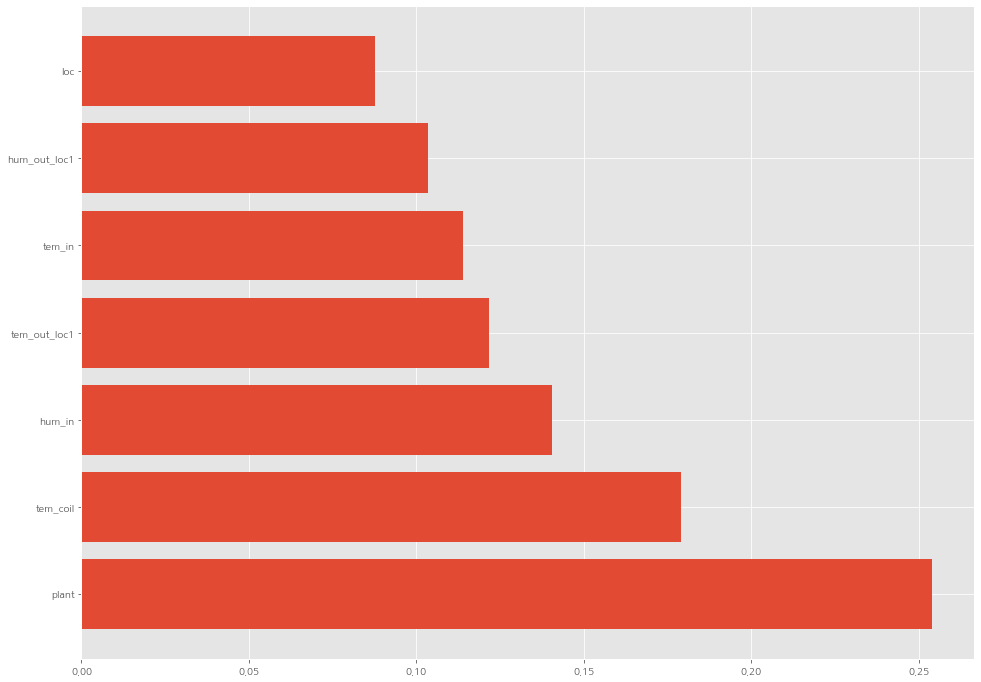

In [86]:
# 결측치를 처리한 버전
test_preds_xgb24, preds_xgb24, y_test_xgb24, feature_importance_fin_xgb24, conf_matrix_xgb24 = XGB_classifier(\
                                                                                        tr_24_ori,
                                                                                        ts_ori,
                                                                                        'after24_loc_predict',
                                                                                        5,
                                                                                        0.5,
                                                                                        real_train = False)

[0]	validation_0-auc:0.76417	validation_1-auc:0.77830
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 300 rounds.
[100]	validation_0-auc:0.99550	validation_1-auc:0.97100
[200]	validation_0-auc:0.99953	validation_1-auc:0.97503
[300]	validation_0-auc:0.99998	validation_1-auc:0.97760
[400]	validation_0-auc:1.00000	validation_1-auc:0.97776
[500]	validation_0-auc:1.00000	validation_1-auc:0.97844
[600]	validation_0-auc:1.00000	validation_1-auc:0.97883
[700]	validation_0-auc:1.00000	validation_1-auc:0.97920
[800]	validation_0-auc:1.00000	validation_1-auc:0.97950
[900]	validation_0-auc:1.00000	validation_1-auc:0.97928
[999]	validation_0-auc:1.00000	validation_1-auc:0.97959
Fold  1 AUC : 0.979694
[0]	validation_0-auc:0.77578	validation_1-auc:0.77179
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 300 r

findfont: Font family ['NanumSquareR'] not found. Falling back to DejaVu Sans.


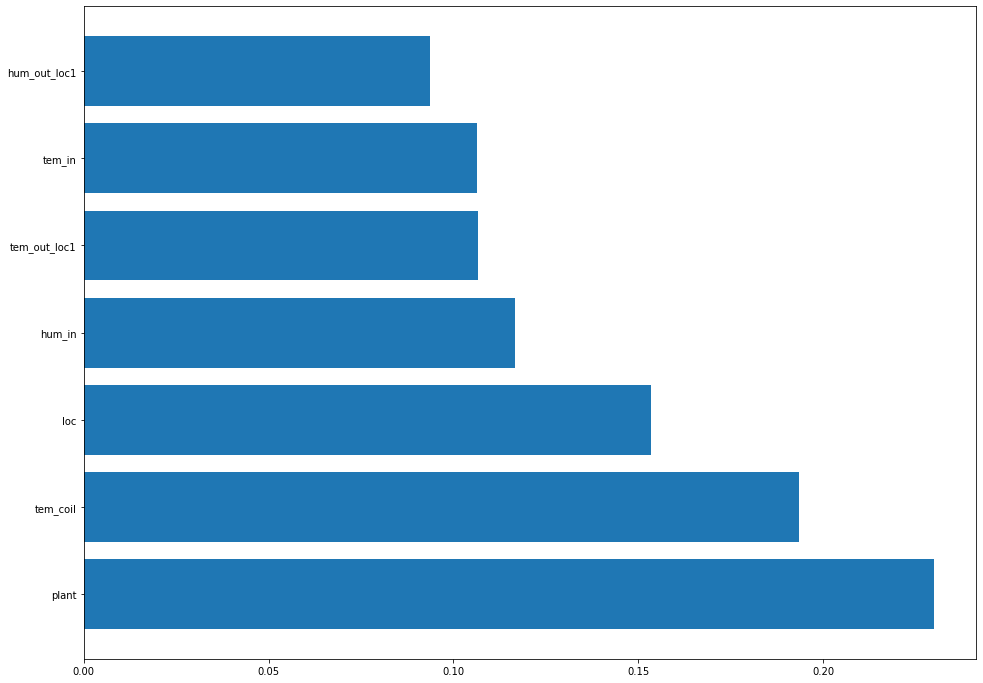

In [9]:
# 결측치를 처리한 버전
test_preds_xgb48, preds_xgb48, y_test_xgb48, feature_importance_fin_xgb48, conf_matrix_xgb48 = XGB_classifier(\
                                                                                        tr_48_ori,
                                                                                        ts_ori,
                                                                                        'after48_loc_predict',
                                                                                        5,
                                                                                        0.5,
                                                                                        real_train = False)

### 3번 데이터

[0]	validation_0-auc:0.90280	validation_1-auc:0.88805
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 300 rounds.
[100]	validation_0-auc:1.00000	validation_1-auc:0.99929
[200]	validation_0-auc:1.00000	validation_1-auc:0.99943
[300]	validation_0-auc:1.00000	validation_1-auc:0.99946
[400]	validation_0-auc:1.00000	validation_1-auc:0.99948
[500]	validation_0-auc:1.00000	validation_1-auc:0.99950
[600]	validation_0-auc:1.00000	validation_1-auc:0.99950
[700]	validation_0-auc:1.00000	validation_1-auc:0.99951
[800]	validation_0-auc:1.00000	validation_1-auc:0.99950
[900]	validation_0-auc:1.00000	validation_1-auc:0.99950
Stopping. Best iteration:
[679]	validation_0-auc:1.00000	validation_1-auc:0.99951

Fold  1 AUC : 0.999513
[0]	validation_0-auc:0.89554	validation_1-auc:0.89247
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-a

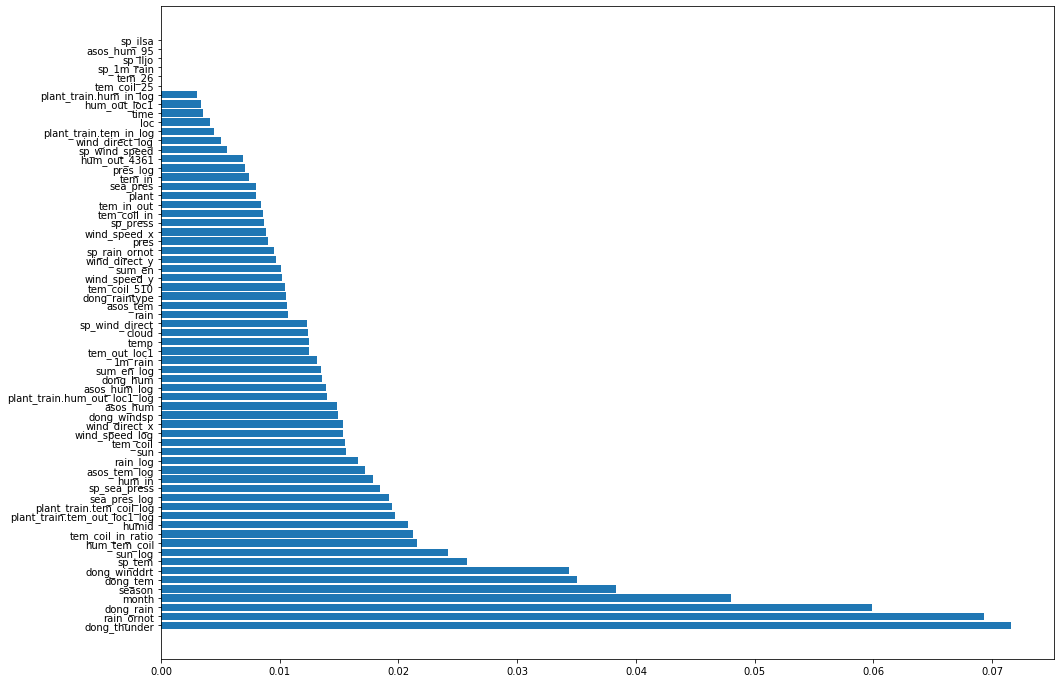

In [17]:
# 결측치를 처리한 버전
test_preds_xgb24_3, preds_xgb24_3, y_test_xgb24_3, feature_importance_fin_xgb24_3, conf_matrix_xgb24_3 = XGB_classifier(\
                                                                                        tr_isx_24,
                                                                                        ts_isx,
                                                                                        'after24_loc_predict',
                                                                                        5,
                                                                                        0.5,
                                                                                        real_train = False)

[0]	validation_0-auc:0.81214	validation_1-auc:0.81183
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 300 rounds.
[100]	validation_0-auc:1.00000	validation_1-auc:0.99854
[200]	validation_0-auc:1.00000	validation_1-auc:0.99877
[300]	validation_0-auc:1.00000	validation_1-auc:0.99877
[400]	validation_0-auc:1.00000	validation_1-auc:0.99879
[500]	validation_0-auc:1.00000	validation_1-auc:0.99880
[600]	validation_0-auc:1.00000	validation_1-auc:0.99876
[700]	validation_0-auc:1.00000	validation_1-auc:0.99877
Stopping. Best iteration:
[435]	validation_0-auc:1.00000	validation_1-auc:0.99884

Fold  1 AUC : 0.998836
[0]	validation_0-auc:0.81606	validation_1-auc:0.79359
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 300 rounds.
[100]	validation_0-auc:1.00000	validation_1-auc:0.99838
[200]	validation_0-auc

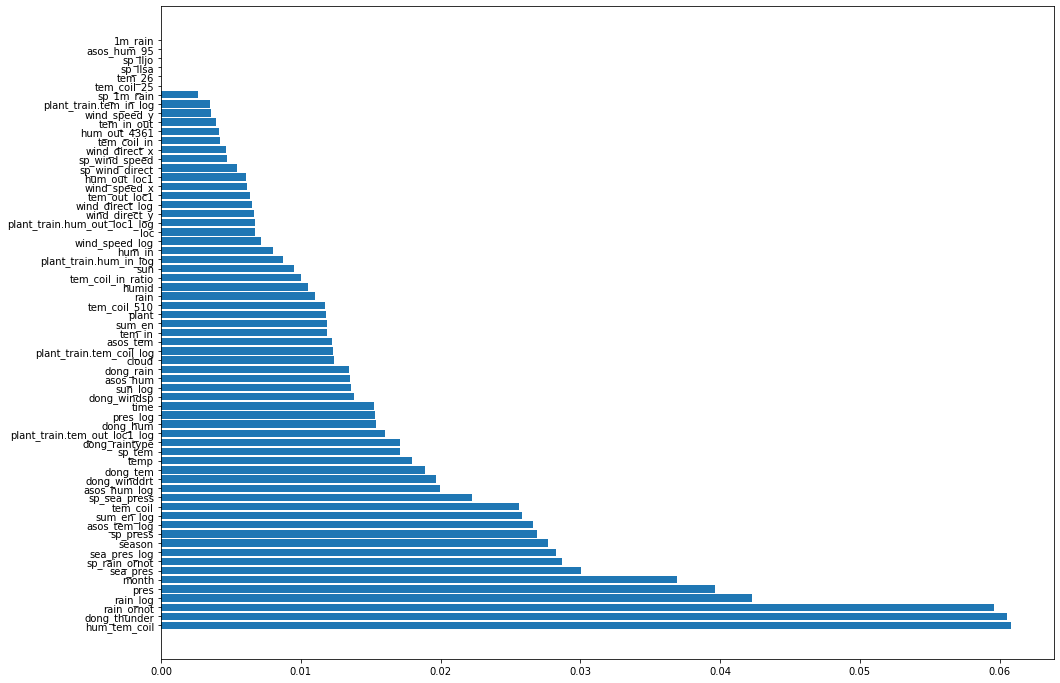

In [18]:
# 결측치를 처리한 버전
test_preds_xgb48_3, preds_xgb48_3, y_test_xgb48_3, feature_importance_fin_xgb48_3, conf_matrix_xgb48_3 = XGB_classifier(\
                                                                                        tr_isx_48,
                                                                                        ts_isx,
                                                                                        'after48_loc_predict',
                                                                                        5,
                                                                                        0.5,
                                                                                        real_train = False)

In [19]:
validation_simple(test_preds_xgb24_3,test_preds_xgb48_3,y_test_xgb24_3,y_test_xgb48_3,0.5)

After 24 hour predict auc :  0.9116444337529828
After 24 hour proba auc :  0.9994625099845311

After 48 hour predict auc :  0.9022976383583718
After 48 hour proba auc :  0.9963430697269618

Cut Off :  0.5

After 24hour confusion matrix : 
 [[  411    88]
 [   31 86458]]

After 48hour confusion matrix : 
 [[  404    98]
 [   16 86191]]

After 24hour CSI :  0.7754716981132076

After 48hour CSI :  0.7799227799227799


([0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [14]:
def validation_simple(proba24,proba48, y_test24, y_test48,cut_off):
    prob24 = proba24
    prob48 = proba48

    prob24_pred = proba_to_int(prob24,cut_off)
    prob48_pred = proba_to_int(prob48,cut_off)
    
    print('After 24 hour predict auc : ',roc_auc_score(y_test24,prob24_pred))
    print('After 24 hour proba auc : ',roc_auc_score(y_test24,prob24))
    
    print('\nAfter 48 hour predict auc : ',roc_auc_score(y_test48,prob48_pred))
    print('After 48 hour proba auc : ',roc_auc_score(y_test48,prob48))
    
    
    conf_matrix24 = confusion_matrix(y_test24,prob24_pred,labels = [1,0])
    conf_matrix48 = confusion_matrix(y_test48,prob48_pred,labels = [1,0])
    print('\nCut Off : ', cut_off)
    print('\nAfter 24hour confusion matrix : \n',conf_matrix24)
    print('\nAfter 48hour confusion matrix : \n',conf_matrix48)
    
    
    csi24 = conf_matrix24[0,0] / (conf_matrix24[0,0] + conf_matrix24[0,1] + conf_matrix24[1,0])
    csi48 = conf_matrix48[0,0] / (conf_matrix48[0,0] + conf_matrix48[0,1] + conf_matrix48[1,0])
    
    print('\nAfter 24hour CSI : ', csi24)
    print('\nAfter 48hour CSI : ', csi48)
    
    return prob24_pred, prob48_pred

In [93]:
validation_simple(test_preds_xgb24,test_preds_xgb48,y_test_xgb24,y_test_xgb48,0.5)

After 24 hour predict auc :  0.7753892319087643
After 24 hour proba auc :  0.9895047990047549

After 48 hour predict auc :  0.6841643483254912
After 48 hour proba auc :  0.9799487539419733

Cut Off :  0.5

After 24hour confusion matrix : 
 [[  275   224]
 [   28 86461]]

After 48hour confusion matrix : 
 [[  185   317]
 [   17 86190]]

After 24hour CSI :  0.5218216318785579

After 48hour CSI :  0.35645472061657035


([0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


### ***Real Test Prediction***

[0]	validation_0-auc:0.90809	validation_1-auc:0.89027
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 300 rounds.
[100]	validation_0-auc:1.00000	validation_1-auc:0.99859
[200]	validation_0-auc:1.00000	validation_1-auc:0.99828
[300]	validation_0-auc:1.00000	validation_1-auc:0.99843
Stopping. Best iteration:
[80]	validation_0-auc:1.00000	validation_1-auc:0.99867

Fold  1 AUC : 0.998674
[0]	validation_0-auc:0.90262	validation_1-auc:0.88656
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 300 rounds.
[100]	validation_0-auc:1.00000	validation_1-auc:0.99829
[200]	validation_0-auc:1.00000	validation_1-auc:0.99779
[300]	validation_0-auc:1.00000	validation_1-auc:0.99749
Stopping. Best iteration:
[60]	validation_0-auc:0.99998	validation_1-auc:0.99867

Fold  2 AUC : 0.998668
[0]	validation_0-auc:0.89169	v

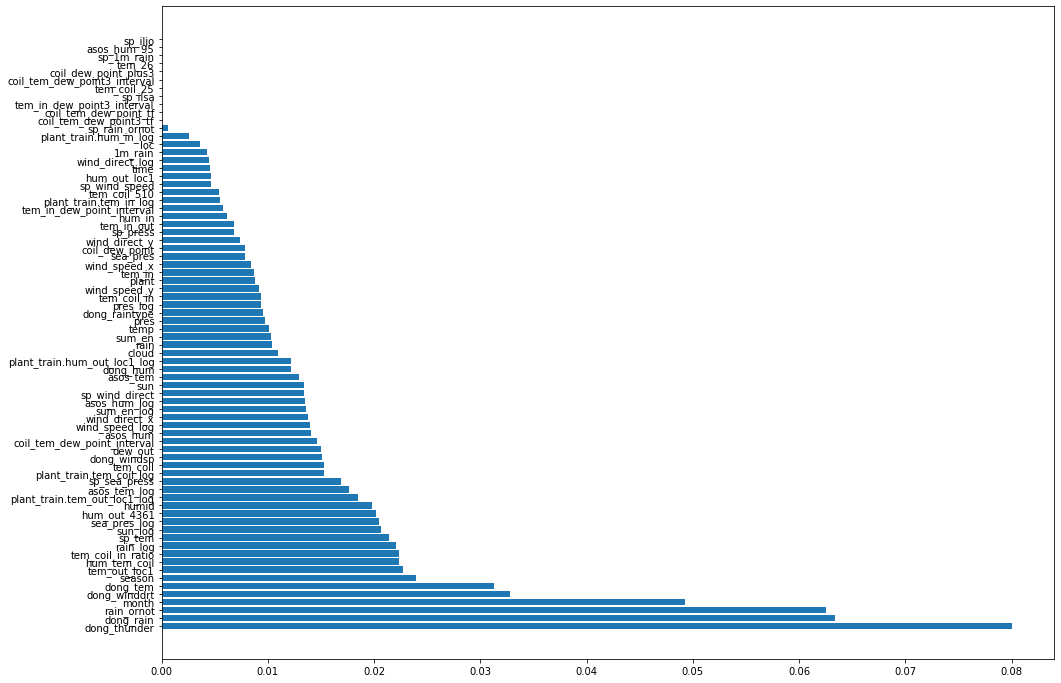

In [54]:
test_preds_xgb24, preds_xgb24, feature_importance_fin_xgb24 = XGB_classifier(\
                                                            train_24_recent,
                                                            dj_ts_aws_recent,
                                                            'after24_loc_predict',
                                                            5,
                                                            0.5,
                                                            real_train = True)

[0]	validation_0-auc:0.88152	validation_1-auc:0.88672
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 300 rounds.
[100]	validation_0-auc:1.00000	validation_1-auc:0.99932
[200]	validation_0-auc:1.00000	validation_1-auc:0.99951
[300]	validation_0-auc:1.00000	validation_1-auc:0.99947
[400]	validation_0-auc:1.00000	validation_1-auc:0.99951
[500]	validation_0-auc:1.00000	validation_1-auc:0.99947
Stopping. Best iteration:
[226]	validation_0-auc:1.00000	validation_1-auc:0.99953

Fold  1 AUC : 0.999526
[0]	validation_0-auc:0.90494	validation_1-auc:0.89430
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 300 rounds.
[100]	validation_0-auc:1.00000	validation_1-auc:0.99574
[200]	validation_0-auc:1.00000	validation_1-auc:0.99572
[300]	validation_0-auc:1.00000	validation_1-auc:0.99532
[400]	validation_0-auc

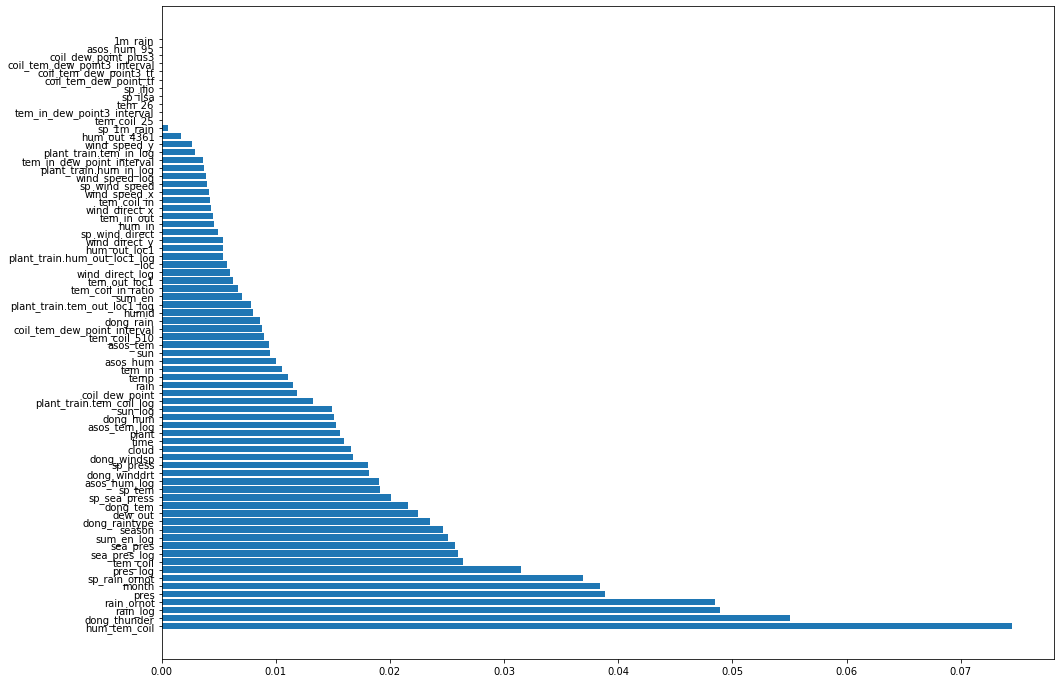

In [55]:
test_preds_xgb48, preds_xgb48, feature_importance_fin_xgb48 = XGB_classifier(\
                                                            train_48_recent,
                                                            dj_ts_aws_recent,
                                                            'after48_loc_predict',
                                                            5,
                                                            0.5,
                                                            real_train = True)

### ***XGB Grid Search***

In [ ]:
# A parameter grid for XGBoost
xgb_params = {
        'min_child_weight': [0.2,0.4,0.5],
        'gamma': [0.4,0.45,0.5],
        'subsample': [0.8,0.9,0.93],
        'colsample_bytree': [0.6,0.7, 0.8],
        'max_depth': [ 4.5, 5, 5.5],
        'learning_rate' : [0.6,0.65,0.7]
        }

#24시간 뒤의 결로현상을 예측하는 교차 모델
param_comb = 5
n = 5

X = train_24_recent.drop(columns = 'after24_loc_predict')
Y = train_24_recent['after24_loc_predict']

folds= KFold(n_splits=n, shuffle = True, random_state = 1001)
xgb_clf = xgb.XGBClassifier(n_estimators = 1000)

random_search_xgb = RandomizedSearchCV(xgb_clf, param_distributions=xgb_params, n_iter=param_comb, scoring='roc_auc', n_jobs=1, cv=folds.split(X,Y), verbose=10, random_state=1001 )

# Here we go
start_time = time.time() # timing starts from this point for "start_time" variable
random_search_xgb.fit(X, Y)
print('걸린 시간 : ', time.time() - start_time) # timing ends here for "start_time" variable

In [ ]:
print('------------------------------------')
print(xgb_params)
print('------------------------------------')
print(random_search_xgb.best_estimator_)
print('------------------------------------')
print(random_search_xgb.best_params_)
print('------------------------------------')
print(random_search_xgb.best_score_)
print('------------------------------------')

# ***LGBM***

In [10]:
def LGBM_classifier(df, test_df, target_variable, num_folds,cut_off , real_train = False):
    
    if real_train == False:
        X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = target_variable),df[target_variable],test_size = 0.25, random_state = 0)

        folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001)

        oof_preds = np.zeros(X_train.shape[0])
        test_preds = np.zeros(X_test.shape[0])
        feature_importance_df = pd.DataFrame()

        for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_train,y_train)):

            train_x, train_y = X_train.iloc[train_idx], y_train.iloc[train_idx]
            valid_x, valid_y = X_train.iloc[valid_idx], y_train.iloc[valid_idx]

            # 파라미터 삽입
            '''params = {}boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=0.8, gamma=0.4, importance_type='split',
               learning_rate=0.6, max_depth=5, min_child_samples=20,
               min_child_weight=0.5, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.8, subsample_for_bin=200000, subsample_freq=0'''
            clf = lgb.LGBMClassifier(class_weight = 'balanced', n_estimators = 1000)

            # 모델 평가척도로 어떤것을 사용할 것인지
            clf.fit(train_x, train_y, eval_set = [(train_x, train_y), (valid_x, valid_y)], 
                   eval_metric='auc', verbose= 100, early_stopping_rounds=300)

            oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration = clf.best_iteration_)[:,1]
            test_preds += clf.predict_proba(X_test, num_iteration = clf.best_iteration_)[:,1] / folds.n_splits

            fold_importance_df = pd.DataFrame()
            fold_importance_df["feature"] = X_train.columns
            fold_importance_df["importance"] = clf.feature_importances_
            fold_importance_df["fold"] = n_fold + 1
            feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

            print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))

            del clf, train_x, train_y, valid_x, valid_y
            gc.collect()

        print('Full AUC score %.6f' % roc_auc_score(y_train, oof_preds))

        feature_importance_fin = feature_importance_df[["feature", "importance"]].\
                                groupby("feature").mean().sort_values(by="importance", ascending=False)

        preds = []

        for i in range(len(test_preds)):
            if test_preds[i] >= cut_off:

                preds.append(1)
            else:
                preds.append(0)

        print('Test AUC score : ', roc_auc_score(y_test, test_preds))
        conf_matrix = confusion_matrix(y_test, preds,labels = [1,0])
        
        plt.figure(figsize = (16,12))
        plt.barh(feature_importance_fin.index,feature_importance_fin['importance'])


        return test_preds, preds, y_test, feature_importance_fin, conf_matrix
    
    elif real_train == True:
        
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001)
        
        test_preds = np.zeros(test_df.shape[0])
        feature_importance_df = pd.DataFrame()
        
        X_train = df.drop(columns = target_variable)
        y_train = df[target_variable]
        
        oof_preds = np.zeros(X_train.shape[0])
        
        test_df = test_df[X_train.columns.tolist()] #컬럼 순서를 맞춰주기 위한 장치
        
        for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_train,y_train)):

            train_x, train_y = X_train.iloc[train_idx], y_train.iloc[train_idx]
            valid_x, valid_y = X_train.iloc[valid_idx], y_train.iloc[valid_idx]

            # 파라미터 삽입
            '''params = {}'''
            clf = lgb.LGBMClassifier(class_weight = 'balanced', n_estimators = 1000)

            # 모델 평가척도로 어떤것을 사용할 것인지
            clf.fit(train_x, train_y, eval_set = [(train_x, train_y), (valid_x, valid_y)], 
                   eval_metric='auc', verbose= 100, early_stopping_rounds=300)

            oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration = clf.best_iteration_)[:,1]
            test_preds += clf.predict_proba(test_df, num_iteration = clf.best_iteration_)[:,1] / folds.n_splits

            fold_importance_df = pd.DataFrame()
            fold_importance_df["feature"] = X_train.columns
            fold_importance_df["importance"] = clf.feature_importances_
            fold_importance_df["fold"] = n_fold + 1
            feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

            print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))

            del clf, train_x, train_y, valid_x, valid_y
            gc.collect()

        print('Full AUC score %.6f' % roc_auc_score(y_train, oof_preds))

        feature_importance_fin = feature_importance_df[["feature", "importance"]].\
                                groupby("feature").mean().sort_values(by="importance", ascending=False)

        preds = []

        for i in range(len(test_preds)):
            if test_preds[i] >= cut_off:

                preds.append(1)
            else:
                preds.append(0)
                
        plt.figure(figsize = (16,12))
        plt.barh(feature_importance_fin.index,feature_importance_fin['importance'])


        return test_preds, preds, feature_importance_fin

### ***Validation***

Training until validation scores don't improve for 300 rounds
[100]	training's auc: 0.996772	training's binary_logloss: 0.092539	valid_1's auc: 0.981397	valid_1's binary_logloss: 0.109506
[200]	training's auc: 0.999385	training's binary_logloss: 0.046308	valid_1's auc: 0.986112	valid_1's binary_logloss: 0.0574071
[300]	training's auc: 0.999818	training's binary_logloss: 0.0268634	valid_1's auc: 0.988486	valid_1's binary_logloss: 0.0355235
[400]	training's auc: 0.999936	training's binary_logloss: 0.0164389	valid_1's auc: 0.988966	valid_1's binary_logloss: 0.0246088
[500]	training's auc: 0.999971	training's binary_logloss: 0.0105307	valid_1's auc: 0.989504	valid_1's binary_logloss: 0.0188673
[600]	training's auc: 0.999991	training's binary_logloss: 0.00679907	valid_1's auc: 0.990138	valid_1's binary_logloss: 0.0153624
[700]	training's auc: 1	training's binary_logloss: 0.00454208	valid_1's auc: 0.990055	valid_1's binary_logloss: 0.0137056
[800]	training's auc: 1	training's binary_logloss:

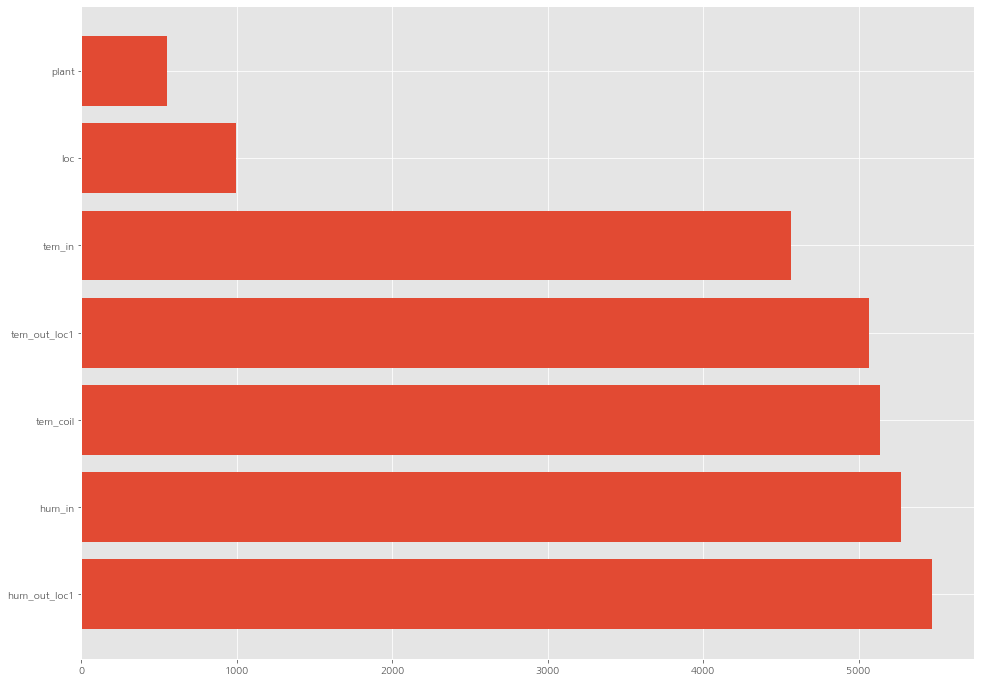

In [84]:
test_preds_lgb24, preds_lgb24, y_test_lgb24, feature_importance_fin_lgb24, conf_matrix_lgb24 = LGBM_classifier(\
                                                                                tr_24_ori,
                                                                                ts_ori,
                                                                                'after24_loc_predict',
                                                                                5,
                                                                                0.5,
                                                                                real_train = False)

Training until validation scores don't improve for 300 rounds
[100]	training's auc: 0.992031	training's binary_logloss: 0.152338	valid_1's auc: 0.968693	valid_1's binary_logloss: 0.178041
[200]	training's auc: 0.998202	training's binary_logloss: 0.0837913	valid_1's auc: 0.974908	valid_1's binary_logloss: 0.101509
[300]	training's auc: 0.999288	training's binary_logloss: 0.0526483	valid_1's auc: 0.975663	valid_1's binary_logloss: 0.0670149
[400]	training's auc: 0.999692	training's binary_logloss: 0.0360125	valid_1's auc: 0.974973	valid_1's binary_logloss: 0.0491399
[500]	training's auc: 0.999872	training's binary_logloss: 0.0246941	valid_1's auc: 0.976246	valid_1's binary_logloss: 0.0372146
[600]	training's auc: 0.999943	training's binary_logloss: 0.0176128	valid_1's auc: 0.976262	valid_1's binary_logloss: 0.0300398
[700]	training's auc: 0.999972	training's binary_logloss: 0.0122847	valid_1's auc: 0.976659	valid_1's binary_logloss: 0.0248482
[800]	training's auc: 0.999985	training's bin

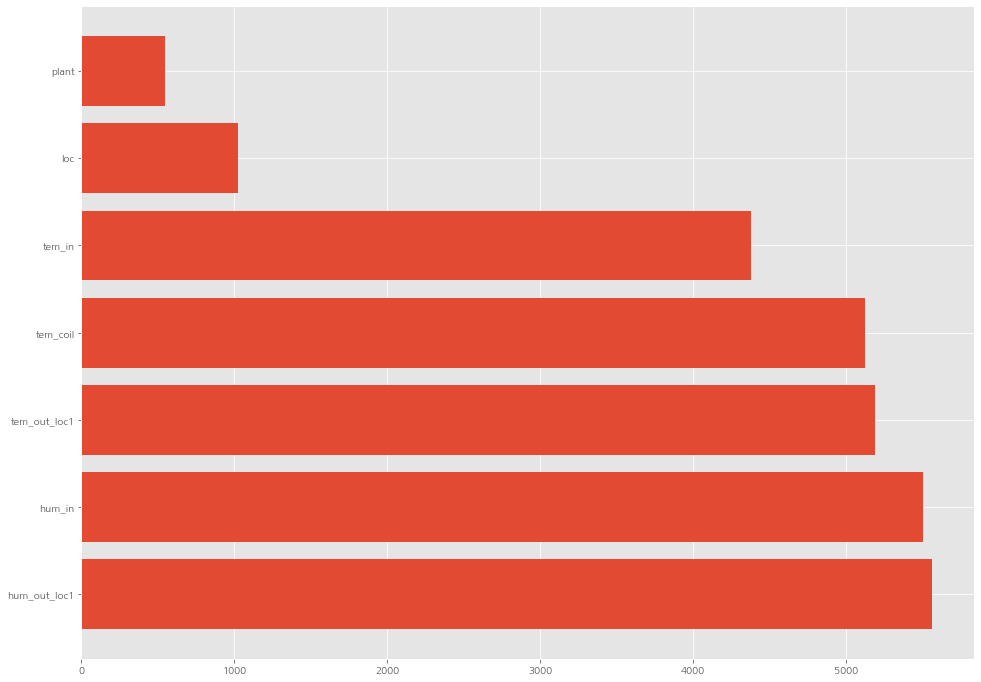

In [85]:
test_preds_lgb48, preds_lgb48, y_test_lgb48, feature_importance_fin_lgb48, conf_matrix_lgb48 = LGBM_classifier(\
                                                                                tr_48_ori,
                                                                                ts_ori,
                                                                                'after48_loc_predict',
                                                                                5,
                                                                                0.5,
                                                                                real_train = False)

In [94]:
validation_simple(test_preds_lgb24,test_preds_lgb48,y_test_lgb24,y_test_lgb48,0.5)

After 24 hour predict auc :  0.8769403784618341
After 24 hour proba auc :  0.9903889222327692

After 48 hour predict auc :  0.8165748850503768
After 48 hour proba auc :  0.9794948062795392

Cut Off :  0.5

After 24hour confusion matrix : 
 [[  377   122]
 [  141 86348]]

After 48hour confusion matrix : 
 [[  319   183]
 [  199 86008]]

After 24hour CSI :  0.5890625

After 48hour CSI :  0.4550641940085592


([0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


### 3번 데이터

Training until validation scores don't improve for 300 rounds
[100]	training's auc: 0.999935	training's binary_logloss: 0.012408	valid_1's auc: 0.995787	valid_1's binary_logloss: 0.0173253
[200]	training's auc: 1	training's binary_logloss: 0.00257536	valid_1's auc: 0.998845	valid_1's binary_logloss: 0.00733069
[300]	training's auc: 1	training's binary_logloss: 0.000695317	valid_1's auc: 0.999216	valid_1's binary_logloss: 0.00574112
[400]	training's auc: 1	training's binary_logloss: 0.000222591	valid_1's auc: 0.999339	valid_1's binary_logloss: 0.00569902
[500]	training's auc: 1	training's binary_logloss: 7.34819e-05	valid_1's auc: 0.999366	valid_1's binary_logloss: 0.00603237
[600]	training's auc: 1	training's binary_logloss: 2.42504e-05	valid_1's auc: 0.999333	valid_1's binary_logloss: 0.00647225
Early stopping, best iteration is:
[323]	training's auc: 1	training's binary_logloss: 0.000531525	valid_1's auc: 0.999244	valid_1's binary_logloss: 0.00567121
Fold  1 AUC : 0.999244
Training u

findfont: Font family ['NanumSquareR'] not found. Falling back to DejaVu Sans.


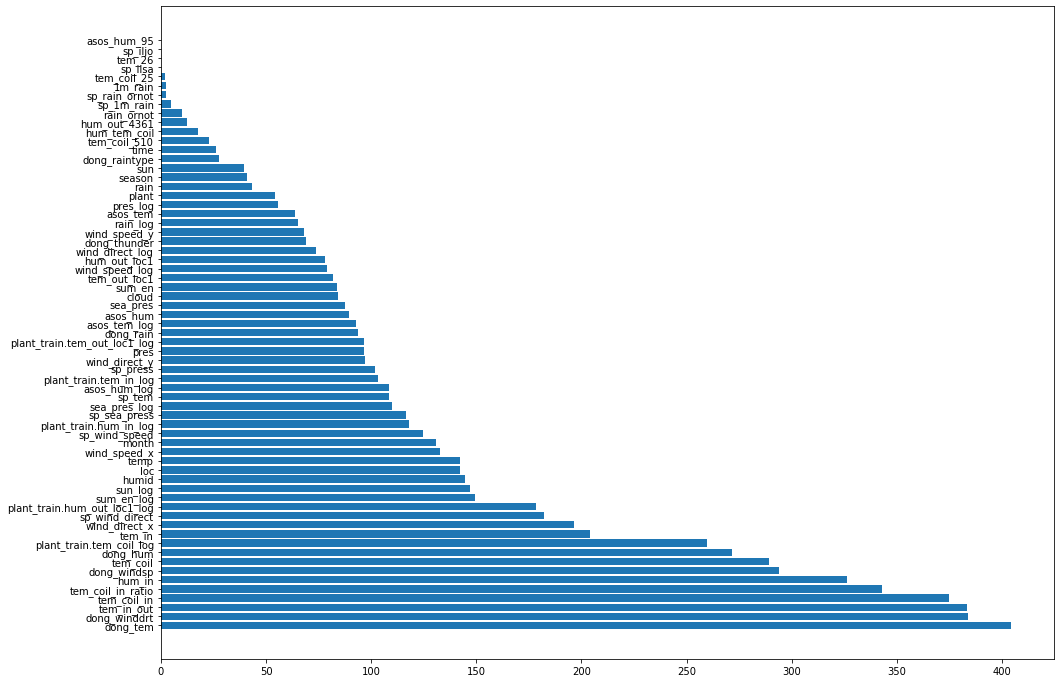

In [11]:
test_preds_lgb24_3, preds_lgb24_3, y_test_lgb24_3, feature_importance_fin_lgb24_3, conf_matrix_lgb24_3 = LGBM_classifier(\
                                                                                tr_isx_24,
                                                                                ts_isx,
                                                                                'after24_loc_predict',
                                                                                5,
                                                                                0.5,
                                                                                real_train = False)

Training until validation scores don't improve for 300 rounds
[100]	training's auc: 0.999861	training's binary_logloss: 0.0209868	valid_1's auc: 0.998068	valid_1's binary_logloss: 0.0262245
[200]	training's auc: 0.999998	training's binary_logloss: 0.00497732	valid_1's auc: 0.997641	valid_1's binary_logloss: 0.00948959
[300]	training's auc: 1	training's binary_logloss: 0.00162858	valid_1's auc: 0.998357	valid_1's binary_logloss: 0.00637448
[400]	training's auc: 1	training's binary_logloss: 0.000577442	valid_1's auc: 0.998667	valid_1's binary_logloss: 0.00543769
[500]	training's auc: 1	training's binary_logloss: 0.000219717	valid_1's auc: 0.99871	valid_1's binary_logloss: 0.00536938
[600]	training's auc: 1	training's binary_logloss: 8.23378e-05	valid_1's auc: 0.998619	valid_1's binary_logloss: 0.00552675
[700]	training's auc: 1	training's binary_logloss: 3.18887e-05	valid_1's auc: 0.998693	valid_1's binary_logloss: 0.00571881
Early stopping, best iteration is:
[492]	training's auc: 1	tra

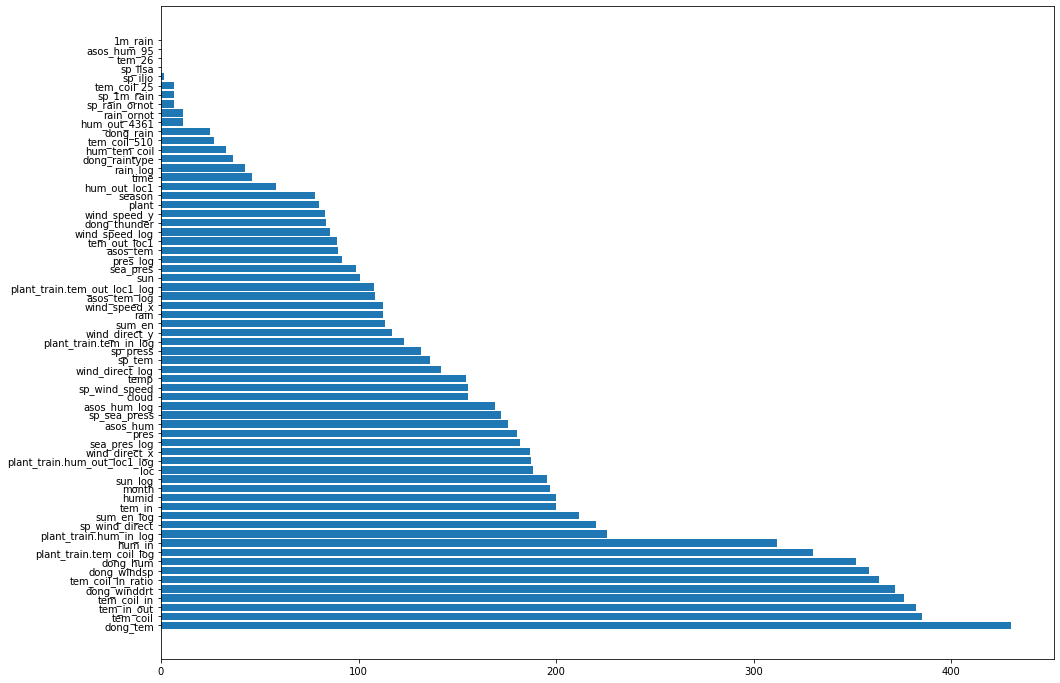

In [13]:
test_preds_lgb48_3, preds_lgb48_3, y_test_lgb48_3, feature_importance_fin_lgb48_3, conf_matrix_lgb48_3 = LGBM_classifier(\
                                                                                tr_isx_48,
                                                                                ts_isx,
                                                                                'after48_loc_predict',
                                                                                5,
                                                                                0.5,
                                                                                real_train = False)

In [15]:
validation_simple(test_preds_lgb24_3,test_preds_lgb48_3,y_test_lgb24_3,y_test_lgb48_3,0.5)

After 24 hour predict auc :  0.9581547328490184
After 24 hour proba auc :  0.9992467678827924

After 48 hour predict auc :  0.962544211082405
After 48 hour proba auc :  0.9962405184556009

Cut Off :  0.5

After 24hour confusion matrix : 
 [[  458    41]
 [  132 86357]]

After 48hour confusion matrix : 
 [[  465    37]
 [  104 86103]]

After 24hour CSI :  0.7258320126782885

After 48hour CSI :  0.7673267326732673


([0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


### ***Real Test Prediction***

Training until validation scores don't improve for 300 rounds
[100]	training's auc: 0.999907	training's binary_logloss: 0.0122989	valid_1's auc: 0.998836	valid_1's binary_logloss: 0.0175927
[200]	training's auc: 0.999993	training's binary_logloss: 0.0029828	valid_1's auc: 0.996834	valid_1's binary_logloss: 0.00766073
[300]	training's auc: 1	training's binary_logloss: 0.000879446	valid_1's auc: 0.994668	valid_1's binary_logloss: 0.00635302
[400]	training's auc: 1	training's binary_logloss: 0.000308215	valid_1's auc: 0.995166	valid_1's binary_logloss: 0.00596667
Early stopping, best iteration is:
[172]	training's auc: 0.999982	training's binary_logloss: 0.00430029	valid_1's auc: 0.999113	valid_1's binary_logloss: 0.00858308
Fold  1 AUC : 0.999113
Training until validation scores don't improve for 300 rounds
[100]	training's auc: 0.999905	training's binary_logloss: 0.0135559	valid_1's auc: 0.998888	valid_1's binary_logloss: 0.0171316
[200]	training's auc: 0.999993	training's binary_loglos

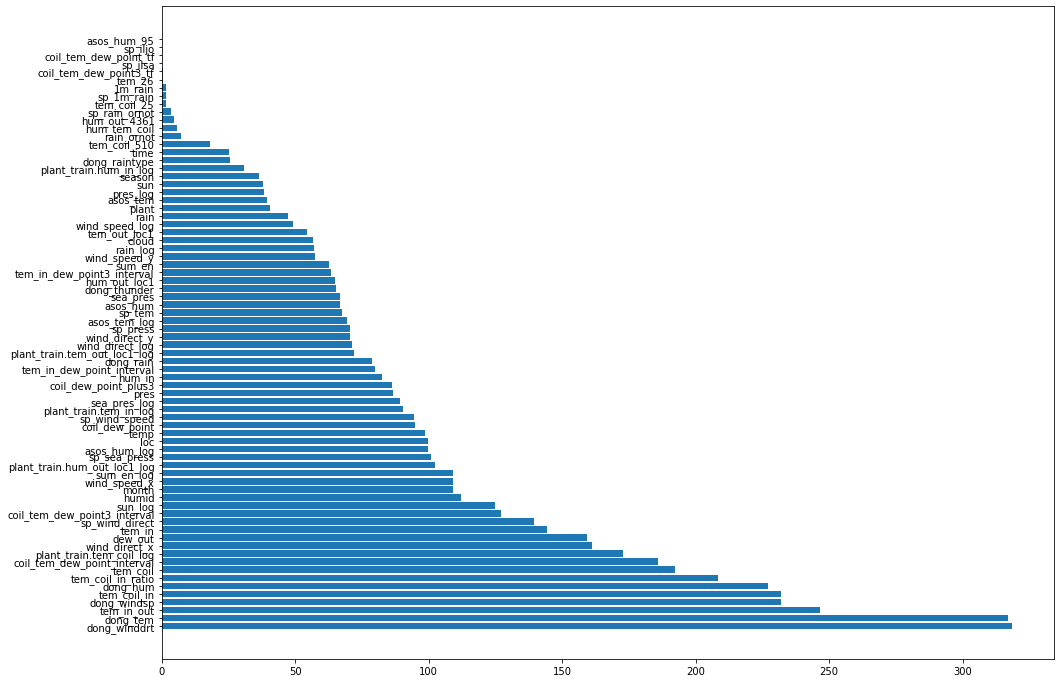

In [56]:
test_preds_lgb24, preds_lgb24, feature_importance_fin_lgb24 = LGBM_classifier(\
                                                                                train_24_recent,
                                                                                dj_ts_aws_recent,
                                                                                'after24_loc_predict',
                                                                                5,
                                                                                0.5,
                                                                                real_train = True)

Training until validation scores don't improve for 300 rounds
[100]	training's auc: 0.999837	training's binary_logloss: 0.0234994	valid_1's auc: 0.999328	valid_1's binary_logloss: 0.0272141
[200]	training's auc: 0.999981	training's binary_logloss: 0.00642938	valid_1's auc: 0.999593	valid_1's binary_logloss: 0.00925013
[300]	training's auc: 0.999998	training's binary_logloss: 0.00224783	valid_1's auc: 0.999654	valid_1's binary_logloss: 0.00553618
[400]	training's auc: 1	training's binary_logloss: 0.000891429	valid_1's auc: 0.999654	valid_1's binary_logloss: 0.00460313
[500]	training's auc: 1	training's binary_logloss: 0.000370678	valid_1's auc: 0.999641	valid_1's binary_logloss: 0.00434189
[600]	training's auc: 1	training's binary_logloss: 0.000155139	valid_1's auc: 0.999567	valid_1's binary_logloss: 0.00435031
Early stopping, best iteration is:
[329]	training's auc: 0.999999	training's binary_logloss: 0.001731	valid_1's auc: 0.999672	valid_1's binary_logloss: 0.00514481
Fold  1 AUC : 0

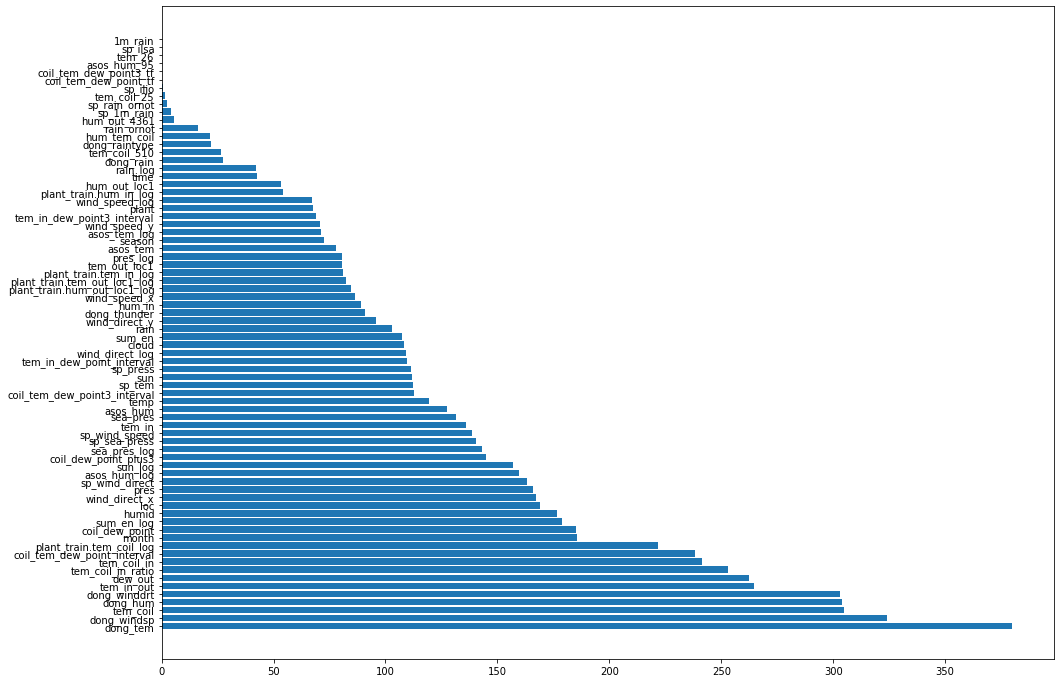

In [57]:
test_preds_lgb48, preds_lgb48, feature_importance_fin_lgb48 = LGBM_classifier(\
                                                                                train_48_recent,
                                                                                dj_ts_aws_recent,
                                                                                'after48_loc_predict',
                                                                                5,
                                                                                0.5,
                                                                                real_train = True)

### ***LGBM Grid Search***

In [ ]:
# A parameter grid for XGBoost
lgb_params = {
        'min_child_weight': [0.5],
        'gamma': [0.4],
        'subsample': [0.8],
        'colsample_bytree': [0.8],
        'max_depth': [5],
        'learning_rate' : [0.6]
        }

#24시간 뒤의 결로현상을 예측하는 교차 모델
param_comb = 5
n = 5

X = train_24_recent.drop(columns = 'after24_loc_predict')
Y = train_24_recent['after24_loc_predict']

folds= KFold(n_splits=n, shuffle = True, random_state = 1001)
lgb_clf = lgb.LGBMClassifier(n_estimators = 1000, class_weight='balanced')

random_search_lgb = RandomizedSearchCV(lgb_clf, param_distributions=lgb_params, n_iter=param_comb, scoring='roc_auc', n_jobs=1, cv=folds.split(X,Y), verbose=10, random_state=1001 )

# Here we go
start_time = time.time() # timing starts from this point for "start_time" variable
random_search_lgb.fit(X, Y)
print('걸린 시간 : ', time.time() - start_time) # timing ends here for "start_time" variable

In [ ]:
print('------------------------------------')
print(lgb_params)
print('------------------------------------')
print(random_search_lgb.best_estimator_)
print('------------------------------------')
print(random_search_lgb.best_params_)
print('------------------------------------')
print(random_search_lgb.best_score_)
print('------------------------------------')

# ***Validation Ensemble Function***

In [88]:
#proba 데이터를 넣어줘야함
def validation_emd(lgb24,lgb48,xgb24,xgb48,y_test24,y_test48,cut_off):
    lgb24 = lgb24
    xgb24 = xgb24

    lgb48 = lgb48
    xgb48 = xgb48

    lgb_xgb_emb24 = (lgb24 + xgb24) / 2
    lgb_xgb_emb48 = (lgb48 + xgb48) / 2

    emb24_pred = proba_to_int(lgb_xgb_emb24,cut_off)
    emb48_pred = proba_to_int(lgb_xgb_emb48,cut_off)
    
    print('After 24 hour predict auc : ',roc_auc_score(y_test24,emb24_pred))
    print('After 24 hour proba auc : ',roc_auc_score(y_test24,lgb_xgb_emb24))
    
    print('\nAfter 48 hour predict auc : ',roc_auc_score(y_test48,emb48_pred))
    print('After 48 hour proba auc : ',roc_auc_score(y_test48,lgb_xgb_emb48))
    
    
    conf_matrix24 = confusion_matrix(y_test24,emb24_pred,labels = [1,0])
    conf_matrix48 = confusion_matrix(y_test48,emb48_pred,labels = [1,0])
    print('\nCut Off : ', cut_off)
    print('\nAfter 24hour confusion matrix : \n',conf_matrix24)
    print('\nAfter 48hour confusion matrix : \n',conf_matrix48)
    
    
    csi24 = conf_matrix24[0,0] / (conf_matrix24[0,0] + conf_matrix24[0,1] + conf_matrix24[1,0])
    csi48 = conf_matrix48[0,0] / (conf_matrix48[0,0] + conf_matrix48[0,1] + conf_matrix48[1,0])
    
    print('\nAfter 24hour CSI : ', csi24)
    print('\nAfter 48hour CSI : ', csi48)
    return emb24_pred, emb48_pred

In [48]:
def proba_to_int(value_ls,cut_off):
    
    preds = []
    for i in range(len(value_ls)):
        
        if value_ls[i] >= cut_off:
            preds.append(1)
        else:
            preds.append(0)
            
            
    return preds

#proba 데이터를 넣어줘야함
def validation_emd(lgb24,lgb48,xgb24,xgb48,logi24,logi48,y_test24,y_test48,cut_off):
    lgb24 = lgb24
    xgb24 = xgb24
    logi24 = logi24

    lgb48 = lgb48
    xgb48 = xgb48
    logi48 = logi48

    lgb_xgb_logi_emb24 = (lgb24 + xgb24 + logi24) / 3
    lgb_xgb_logi_emb48 = (lgb48 + xgb48 + logi48) / 3
    

    emb24_pred = proba_to_int(lgb_xgb_logi_emb24,cut_off)
    emb48_pred = proba_to_int(lgb_xgb_logi_emb48,cut_off)
    
    print('After 24 hour predict auc : ',roc_auc_score(y_test24,emb24_pred))
    print('After 24 hour proba auc : ',roc_auc_score(y_test24,lgb_xgb_logi_emb24))
    
    print('\nAfter 48 hour predict auc : ',roc_auc_score(y_test48,emb48_pred))
    print('After 48 hour proba auc : ',roc_auc_score(y_test48,lgb_xgb_logi_emb48))
    
    
    conf_matrix24 = confusion_matrix(y_test24,emb24_pred,labels = [1,0])
    conf_matrix48 = confusion_matrix(y_test48,emb48_pred,labels = [1,0])
    print('\nCut Off : ', cut_off)
    print('\nAfter 24hour confusion matrix : \n',conf_matrix24)
    print('\nAfter 48hour confusion matrix : \n',conf_matrix48)
    
    
    csi24 = conf_matrix24[0,0] / (conf_matrix24[0,0] + conf_matrix24[0,1] + conf_matrix24[1,0])
    csi48 = conf_matrix48[0,0] / (conf_matrix48[0,0] + conf_matrix48[0,1] + conf_matrix48[1,0])
    
    print('\nAfter 24hour CSI : ', csi24)
    print('\nAfter 48hour CSI : ', csi48)
    return emb24_pred, emb48_pred

def validation_emd2(lgb24,lgb48,xgb24,xgb48,rf24,rf48,y_test24,y_test48,n):
    lgb24 = lgb24
    xgb24 = xgb24
    rf24 = rf24

    lgb48 = lgb48
    xgb48 = xgb48
    rf48 = rf48

    emb24 = (lgb24 + xgb24 + rf24) / n
    emb48 = (lgb48 + xgb48 + rf48) / n

    emb24_pred = proba_to_int(emb24)
    emb48_pred = proba_to_int(emb48)
    
    conf_matrix24 = confusion_matrix(y_test24,emb24_pred,labels = [1,0])
    conf_matrix48 = confusion_matrix(y_test48,emb48_pred,labels = [1,0])
    
    
    print('After 24hour confusion matrix : \n',conf_matrix24)
    print('\nAfter 48hour confusion matrix : \n',conf_matrix48)
    
    csi24 = conf_matrix24[0,0] / (conf_matrix24[0,0] + conf_matrix24[0,1] + conf_matrix24[1,0])
    csi48 = conf_matrix48[0,0] / (conf_matrix48[0,0] + conf_matrix48[0,1] + conf_matrix48[1,0])
    
    print('\nAfter 24hour CSI : ', csi24)
    print('\nAfter 48hour CSI : ', csi48)
    return emb24_pred, emb48_pred

In [49]:
emb24_pred, emb48_pred = validation_emd(test_preds_lgb24,test_preds_lgb48,test_preds_xgb24,test_preds_xgb48,test_preds_logi24,test_preds_logi48,y_test_lgb24,y_test_lgb48,0.5)

After 24 hour predict auc :  0.8996666343126888
After 24 hour proba auc :  0.9991002597408858

After 48 hour predict auc :  0.8843983514709822
After 48 hour proba auc :  0.9919659698001988

Cut Off :  0.5

After 24hour confusion matrix : 
 [[  399   100]
 [   23 86466]]

After 48hour confusion matrix : 
 [[  386   116]
 [   11 86196]]

After 24hour CSI :  0.764367816091954

After 48hour CSI :  0.7524366471734892


In [89]:
emb24_pred, emb48_pred = validation_emd(test_preds_lgb24,test_preds_lgb48,test_preds_xgb24,test_preds_xgb48,y_test_lgb24,y_test_lgb48,0.5)

After 24 hour predict auc :  0.8413596261421777
After 24 hour proba auc :  0.9909128805773743

After 48 hour predict auc :  0.7626814074914744
After 48 hour proba auc :  0.9801310724482907

Cut Off :  0.5

After 24hour confusion matrix : 
 [[  341   158]
 [   56 86433]]

After 48hour confusion matrix : 
 [[  264   238]
 [   46 86161]]

After 24hour CSI :  0.6144144144144145

After 48hour CSI :  0.48175182481751827


# ***Real Test Ensemble***

In [ ]:
def real_ensemble(lgb24, lgb48, xgb24, xgb48):
    lgb24 = lgb24
    xgb24 = xgb24

    lgb48 = lgb48
    xgb48 = xgb48

    lgb_xgb_emb24 = (lgb24 + xgb24) / 2
    lgb_xgb_emb48 = (lgb48 + xgb48) / 2

    emb24_pred = proba_to_int(lgb_xgb_emb24,0.1)
    emb48_pred = proba_to_int(lgb_xgb_emb48,0.1)
    
    emb24_proba = lgb_xgb_emb24*100.0
    emb48_proba = lgb_xgb_emb48*100.0
    
    return emb24_pred,emb48_pred,emb24_proba,emb48_proba
    

In [62]:
def real_ensemble(lgb24, lgb48, xgb24, xgb48, logi24, logi48):
    lgb24 = lgb24
    xgb24 = xgb24
    logi24 = logi24

    lgb48 = lgb48
    xgb48 = xgb48
    logi48 = logi48

    lgb_xgb_logi_emb24 = (lgb24 + xgb24 + logi24) / 3
    lgb_xgb_logi_emb48 = (lgb48 + xgb48 + logi48) / 3

    emb24_pred = proba_to_int(lgb_xgb_logi_emb24,0.05)
    emb48_pred = proba_to_int(lgb_xgb_logi_emb48,0.05)
    
    emb24_proba = lgb_xgb_logi_emb24*100.0
    emb48_proba = lgb_xgb_logi_emb48*100.0
    
    return emb24_pred,emb48_pred,emb24_proba,emb48_proba
    

In [ ]:
emb24_pred, emb48_pred, emb24_proba,emb48_proba = real_ensemble(test_preds_lgb24,test_preds_lgb48,test_preds_xgb24,test_preds_xgb48)

In [63]:
emb24_pred, emb48_pred, emb24_proba,emb48_proba = real_ensemble(test_preds_lgb24,test_preds_lgb48,test_preds_xgb24,test_preds_xgb48,test_preds_logi24,test_preds_logi48)

In [64]:
valid['X24H_COND_LOC'] = emb24_pred
valid['X48H_COND_LOC'] = emb48_pred

valid['X24H_COND_LOC_PROB'] = emb24_proba
valid['X48H_COND_LOC_PROB'] = emb48_proba

In [69]:
valid

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 0:00,2,3,2019-04-02 0:00,0,0.026963,2019-04-03 0:00,0,0.132756
1,2019-04-01 4:30,1,2,2019-04-02 4:30,0,0.022905,2019-04-03 4:30,0,0.067040
2,2019-04-01 10:30,2,3,2019-04-02 10:30,0,0.062326,2019-04-03 10:30,0,0.051180
3,2019-04-01 11:00,1,1,2019-04-02 11:00,0,0.109466,2019-04-03 11:00,0,0.117200
4,2019-04-01 13:30,2,1,2019-04-02 13:30,0,0.056266,2019-04-03 13:30,0,0.087872
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 3:00,1,2,2020-03-30 3:00,0,0.004736,2020-03-31 3:00,0,2.453684
3535,2020-03-29 5:00,2,3,2020-03-30 5:00,0,0.001344,2020-03-31 5:00,0,1.003173
3536,2020-03-29 7:00,2,1,2020-03-30 7:00,0,0.005276,2020-03-31 7:00,0,0.954532
3537,2020-03-29 11:30,1,1,2020-03-30 11:30,0,0.000768,2020-03-31 11:30,1,32.712076


In [ ]:
valid.to_csv('203675.csv',index = False)